In [2]:
import pandas as pd
import numpy as np

# Haversine formula to calculate distance between two lat/long points in miles
def haversine(lon1, lat1, lon2, lat2):
    # Radius of the Earth in miles
    R = 3958.8
    # Convert degrees to radians
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    # Difference in coordinates
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    # Haversine formula
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    distance = R * c
    return distance



In [57]:
# Load the data
zip_codes = pd.read_csv('zip_code_lat_long.csv')
top_500_zip_codes = pd.read_csv('zip_code_top_500_pop.csv')

# Prepare an empty DataFrame to hold the distances
distances = pd.DataFrame()


In [58]:
zip_codes

,ZIP,LAT,LNG
0,601,18.180555,-66.749961
1,602,18.361945,-67.175597
2,603,18.455183,-67.119887
3,606,18.158345,-66.932911
4,610,18.295366,-67.125135
...,...,...,...
33139,99923,56.002315,-130.041026
33140,99925,55.550204,-132.945933
33141,99926,55.138352,-131.470424
33142,99927,56.239062,-133.457924


In [59]:
top_500_zip_codes

,zip,population,zip_code,latitude,longitude,city,state,county
0,8701,134008,8701,39.9452,-74.1498,Lakewood,NJ,Ocean
1,77494,130920,77494,29.8340,-95.4342,Katy,TX,Fort Bend
2,77449,122098,77449,29.8340,-95.4342,Katy,TX,Harris
3,78660,113386,78660,30.4427,-97.5971,Pflugerville,TX,Travis
4,11368,112750,11368,40.7488,-73.8543,Corona,NY,Queens
...,...,...,...,...,...,...,...,...
495,85033,59904,85033,33.2765,-112.1870,Phoenix,AZ,Maricopa
496,92571,59896,92571,33.7529,-116.0560,Perris,CA,Riverside
497,10460,59852,10460,40.8418,-73.8790,Bronx,NY,Bronx
498,92071,59795,92071,32.8440,-116.9950,Santee,CA,San Diego


In [60]:
zc = zip_codes[420:430]
zc

,ZIP,LAT,LNG
420,1906,42.468432,-71.013946
421,1907,42.474145,-70.906597
422,1908,42.428256,-70.926041
423,1913,42.851293,-70.955810
424,1915,42.570665,-70.867583
425,1921,42.683108,-71.018330
426,1922,42.757313,-70.914241
427,1923,42.574174,-70.950516
428,1929,42.640420,-70.771172
429,1930,42.619910,-70.681824


In [61]:

# Calculate distances from each zip code to each of the top 500 zip codes
for i, top_zip in top_500_zip_codes.iterrows():
    col_name = f"Distance_to_{top_zip['zip_code']}"
    distances[col_name] = zc.apply(lambda x: haversine(top_zip['longitude'], top_zip['latitude'], x['LNG'], x['LAT']), axis=1)



In [62]:
distances

,Distance_to_8701,Distance_to_77494,Distance_to_77449,Distance_to_78660,Distance_to_11368,Distance_to_60629,Distance_to_77084,Distance_to_11208,Distance_to_77433,Distance_to_79936,...,Distance_to_78501,Distance_to_78753,Distance_to_44060,Distance_to_93313,Distance_to_28227,Distance_to_85033,Distance_to_92571,Distance_to_10460,Distance_to_92071,Distance_to_93458
420,238.640191,1608.960538,1608.960538,1684.543333,188.790133,854.063784,1608.960538,195.002965,1608.960538,2061.139184,...,1899.363870,1690.981741,531.489187,2594.107051,726.584910,2309.062482,2490.871433,185.744389,2568.263458,2679.103264
421,242.761938,1614.092162,1614.092162,1689.798715,193.367933,859.511141,1614.092162,199.539509,1614.092162,2066.601383,...,1904.407658,1696.236448,536.971891,2599.516476,730.982545,2314.544179,2496.331964,190.412945,2573.730135,2684.506258
422,239.825179,1611.866271,1611.866271,1687.751761,190.675313,858.671783,1611.866271,196.820191,1611.866271,2065.110324,...,1902.077581,1694.188358,535.859991,2598.831545,728.166302,2313.442740,2495.416838,187.781511,2572.774638,2683.843805
423,260.192431,1622.913251,1622.913251,1696.859578,208.282977,856.212583,1622.913251,214.700993,1622.913251,2068.519947,...,1914.246573,1703.307388,536.184586,2594.673317,746.377294,2313.106225,2493.344677,204.707768,2571.067293,2679.480053
424,248.900758,1618.694617,1618.694617,1694.022811,199.014881,861.214597,1618.694617,205.239232,1618.694617,2069.651114,...,1909.228410,1700.462885,539.269130,2600.868208,736.844148,2316.772624,2498.167727,195.935788,2575.650259,2685.810318
425,249.353955,1615.053001,1615.053001,1689.664702,198.109095,853.295728,1615.053001,204.461734,1615.053001,2063.395585,...,1906.020355,1696.108828,532.095222,2592.529486,736.233653,2309.425029,2490.354611,194.715577,2567.933013,2677.421929
426,256.697918,1622.022819,1622.022819,1696.449496,205.463608,858.445563,1622.022819,211.819490,1622.022819,2069.475905,...,1913.081907,1702.894735,537.741486,2597.337951,743.590195,2314.922631,2495.550834,202.057640,2573.193612,2682.190249
427,246.148435,1614.970990,1614.970990,1690.167607,195.871520,856.988592,1614.970990,202.131381,1614.970990,2065.529323,...,1905.592622,1696.608400,535.068371,2596.644045,733.822244,2312.565064,2493.943713,192.710606,2571.428501,2681.587308
428,255.774653,1625.171041,1625.171041,1700.321238,205.849826,865.939401,1625.171041,212.082829,1625.171041,2075.281446,...,1915.796312,1706.762448,544.435751,2605.303199,743.705859,2321.854245,2502.966738,202.746509,2580.510415,2690.208118
429,257.977843,1628.698646,1628.698646,1704.063704,208.569916,870.528600,1628.698646,214.754747,1628.698646,2079.529307,...,1919.186442,1710.503705,548.888236,2609.957465,746.224133,2326.340317,2507.538619,205.575678,2585.065534,2694.869261


In [63]:
# Determine urban/rural status based on distance
urban_rural = distances.min(axis=1).apply(lambda x: 'Urban' if x <= 20 else 'Rural')

# Add urban/rural classification to the zip_codes DataFrame
zc['Urban_Rural'] = urban_rural

# Save or use the DataFrame as needed
print(zc.head(20))

      ZIP        LAT        LNG Urban_Rural
420  1906  42.468432 -71.013946       Urban
421  1907  42.474145 -70.906597       Urban
422  1908  42.428256 -70.926041       Urban
423  1913  42.851293 -70.955810       Rural
424  1915  42.570665 -70.867583       Urban
425  1921  42.683108 -71.018330       Urban
426  1922  42.757313 -70.914241       Rural
427  1923  42.574174 -70.950516       Urban
428  1929  42.640420 -70.771172       Rural
429  1930  42.619910 -70.681824       Rural


<ipython-input-63-cac6101ff021>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zc['Urban_Rural'] = urban_rural


In [67]:
output_file="zip_code_urban_rural.csv"
zc.to_csv(output_file, index=False)

In [70]:
import pandas as pd
from scipy.stats import ttest_ind

# Load the datasets
zip_code_urban_rural = pd.read_csv('zip_code_urban_rural.csv', header=0, names=['zip_code', 'lat', 'long', 'Urban_Rural'])
family_practice_cost_by_zip_code = pd.read_csv('family_practice_cost_by_zip_code.csv')


In [72]:
zip_code_urban_rural
family_practice_cost_by_zip_code

,zip_code,min_medicare_pricing_for_new_patient,max_medicare_pricing_for_new_patient,mode_medicare_pricing_for_new_patient,min_copay_for_new_patient,max_copay_for_new_patient,mode_copay_for_new_patient,most_utilized_procedure_code_for_new_patient,min_medicare_pricing_for_established_patient,max_medicare_pricing_for_established_patient,mode_medicare_pricing_for_established_patient,min_copay_for_established_patient,max_copay_for_established_patient,mode_copay_for_established_patient,most_utilized_procedure_code_for_established_patient
0,210,60.136,181.552,92.256,15.034,45.388,23.064,99203,18.896,148.440,106.440,4.724,37.110,26.610,99214
1,211,60.136,181.552,92.256,15.034,45.388,23.064,99203,18.896,148.440,106.440,4.724,37.110,26.610,99214
2,212,60.136,181.552,92.256,15.034,45.388,23.064,99203,18.896,148.440,106.440,4.724,37.110,26.610,99214
3,213,60.136,181.552,92.256,15.034,45.388,23.064,99203,18.896,148.440,106.440,4.724,37.110,26.610,99214
4,214,60.136,181.552,92.256,15.034,45.388,23.064,99203,18.896,148.440,106.440,4.724,37.110,26.610,99214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42954,99926,74.816,233.632,116.688,18.704,58.408,29.172,99203,22.376,190.744,135.848,5.594,47.686,33.962,99214
42955,99927,74.816,233.632,116.688,18.704,58.408,29.172,99203,22.376,190.744,135.848,5.594,47.686,33.962,99214
42956,99928,74.816,233.632,116.688,18.704,58.408,29.172,99203,22.376,190.744,135.848,5.594,47.686,33.962,99214
42957,99929,74.816,233.632,116.688,18.704,58.408,29.172,99203,22.376,190.744,135.848,5.594,47.686,33.962,99214


In [73]:

# Merge the datasets on zip code
merged_data = pd.merge(family_practice_cost_by_zip_code, zip_code_urban_rural, on='zip_code')


In [89]:

# Split the data into urban and rural based on the 'Urban_Rural' column
urban_costs = merged_data[merged_data['Urban_Rural'] == 'Urban']['min_medicare_pricing_for_established_patient']
rural_costs = merged_data[merged_data['Urban_Rural'] == 'Rural']['min_medicare_pricing_for_established_patient']


In [76]:

# Perform a t-test to compare the means of the two groups
t_stat, p_value = ttest_ind(urban_costs, rural_costs, equal_var=False, nan_policy='omit')

# Print the results
print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Determine if the results are statistically significant
if p_value < 0.05:
    print("There is a significant difference in family practice costs between urban and rural areas.")
else:
    print("There is no significant difference in family practice costs between urban and rural areas.")


T-statistic: 75.0343942148992, P-value: 0.0
There is a significant difference in family practice costs between urban and rural areas.


In [79]:
urban_costs = merged_data[merged_data['Urban_Rural'] == 'Urban']
rural_costs = merged_data[merged_data['Urban_Rural'] == 'Rural']

output_file="family_practice_urban.csv"
urban_costs.to_csv(output_file, index=False)

output_file="family_practice_rural.csv"
rural_costs.to_csv(output_file, index=False)

In [94]:
ttest_ind(urban_costs, rural_costs, equal_var=False, nan_policy='omit')

Ttest_indResult(statistic=75.0343942148992, pvalue=0.0)

In [92]:
p_value

0.0

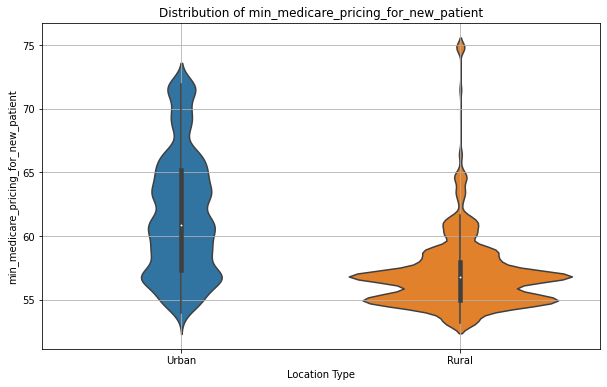

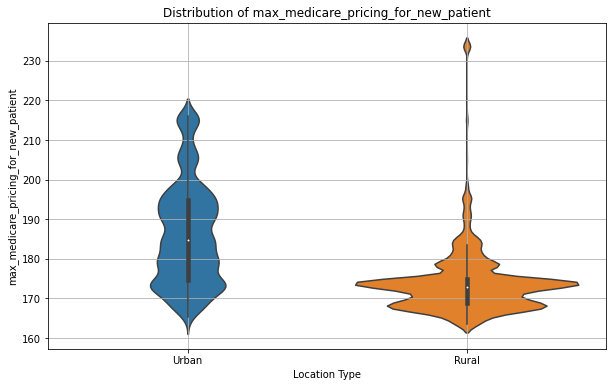

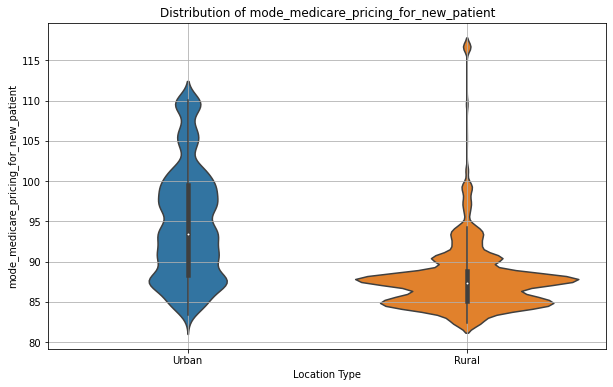

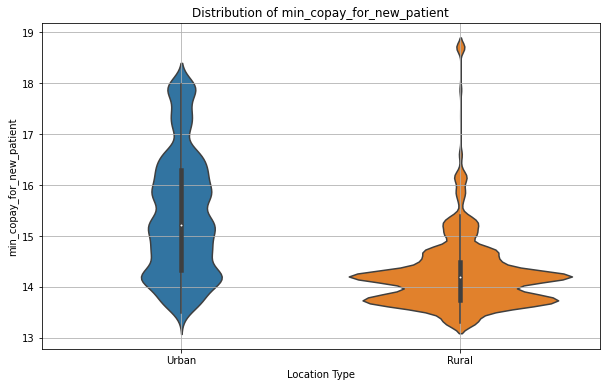

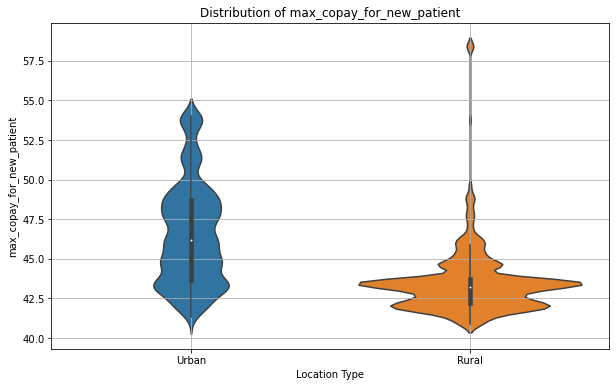

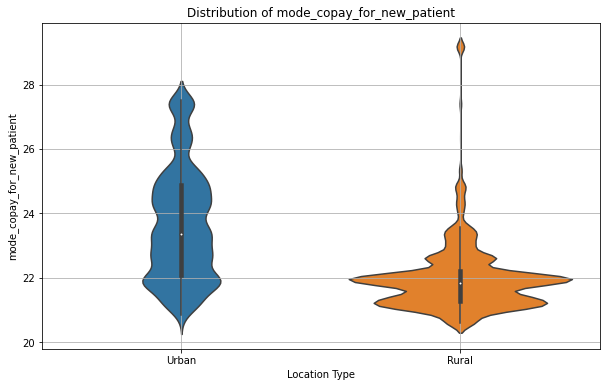

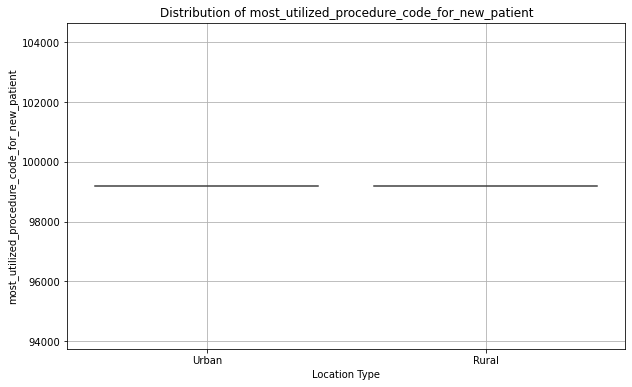

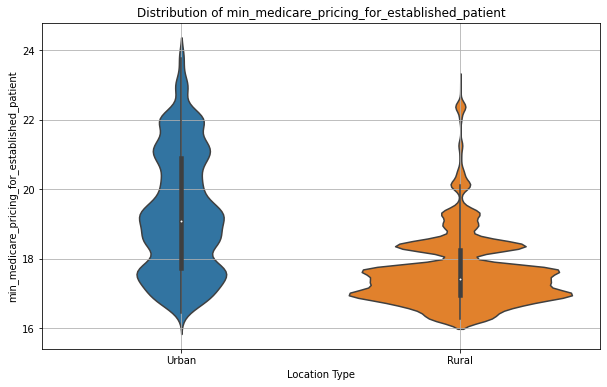

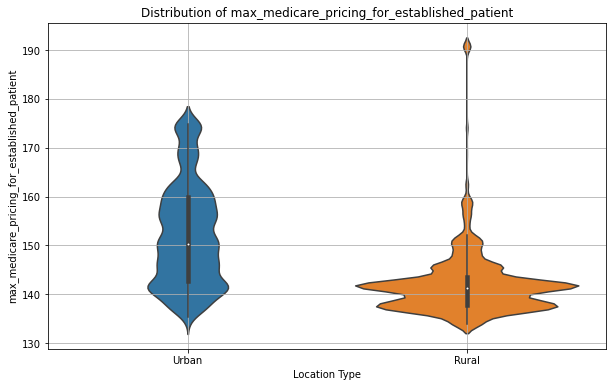

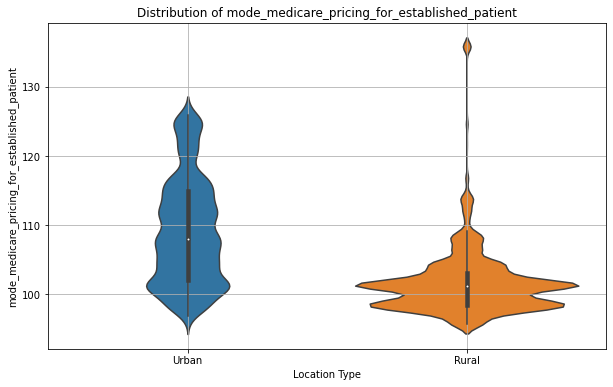

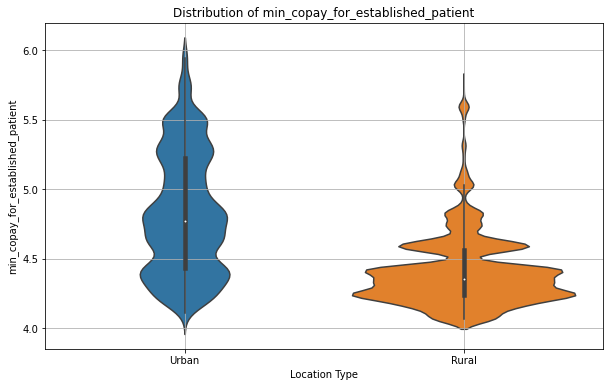

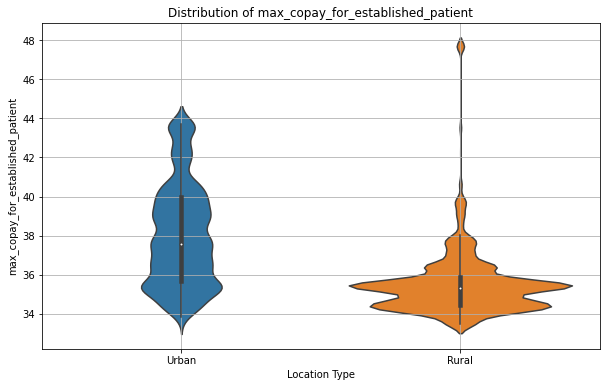

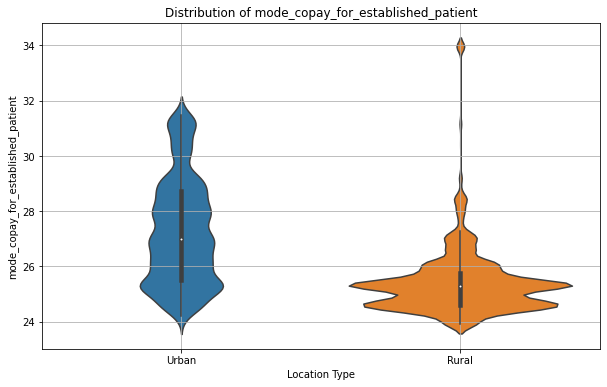

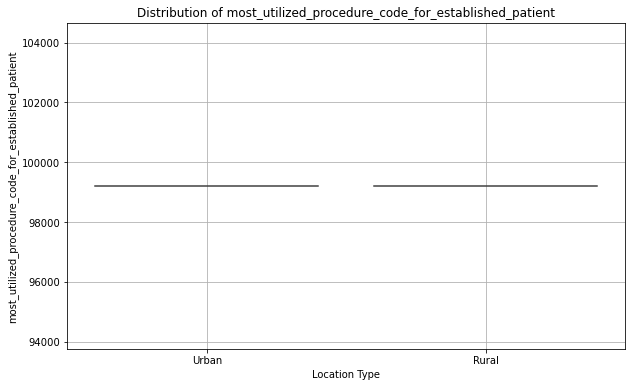

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# Load the datasets
zip_code_urban_rural = pd.read_csv('zip_code_urban_rural.csv', header=0, names=['zip_code', 'lat', 'long', 'Urban_Rural'])
family_practice_cost_by_zip_code = pd.read_csv('family_practice_cost_by_zip_code.csv')

# Merge the datasets on zip code
merged_data = pd.merge(family_practice_cost_by_zip_code, zip_code_urban_rural, on='zip_code')

cols = ["min_medicare_pricing_for_new_patient", "max_medicare_pricing_for_new_patient", 
        "mode_medicare_pricing_for_new_patient", "min_copay_for_new_patient", 
        "max_copay_for_new_patient", "mode_copay_for_new_patient", 
        "most_utilized_procedure_code_for_new_patient", 
        "min_medicare_pricing_for_established_patient", "max_medicare_pricing_for_established_patient", 
        "mode_medicare_pricing_for_established_patient", "min_copay_for_established_patient", 
        "max_copay_for_established_patient", "mode_copay_for_established_patient", 
        "most_utilized_procedure_code_for_established_patient"]

for c in cols:
    # Create the violin plot
    plt.figure(figsize=(10, 6))
    sns.violinplot(x='Urban_Rural', y=c, data=merged_data)

    # Customize the plot
    plt.title('Distribution of ' + c)
    plt.xlabel('Location Type')
    plt.ylabel(c)
    plt.grid(True)

    # Show the plot
    plt.savefig(c + ".jpg")

    



In [ ]:
import pandas as pd
from scipy.stats import ttest_ind

# Load the datasets
zip_code_urban_rural = pd.read_csv('zip_code_urban_rural.csv', header=0, names=['zip_code', 'lat', 'long', 'Urban_Rural'])
family_practice_cost_by_zip_code = pd.read_csv('family_practice_cost_by_zip_code.csv')

# Merge the datasets on zip code
merged_data = pd.merge(family_practice_cost_by_zip_code, zip_code_urban_rural, on='zip_code')

urban_costs = merged_data[merged_data['Urban_Rural'] == 'Urban']
rural_costs = merged_data[merged_data['Urban_Rural'] == 'Rural']

output_file="family_practice_urban.csv"
urban_costs.to_csv(output_file, index=False)

output_file="family_practice_rural.csv"
rural_costs.to_csv(output_file, index=False)

In [ ]:
import pandas as pd
from scipy.stats import ttest_ind

# Load the datasets
zip_code_urban_rural = pd.read_csv('zip_code_urban_rural.csv', header=0, names=['zip_code', 'lat', 'long', 'Urban_Rural'])
family_practice_cost_by_zip_code = pd.read_csv('family_practice_cost_by_zip_code.csv')

# Merge the datasets on zip code
merged_data = pd.merge(family_practice_cost_by_zip_code, zip_code_urban_rural, on='zip_code')

urban_costs = merged_data[merged_data['Urban_Rural'] == 'Urban']
rural_costs = merged_data[merged_data['Urban_Rural'] == 'Rural']

output_file="family_practice_urban.csv"
urban_costs.to_csv(output_file, index=False)

output_file="family_practice_rural.csv"
rural_costs.to_csv(output_file, index=False)